<h1> Predicting visitor type based on time spent on product-related and informational pages</h1>
<br>
<h2>Introduction</h2> 
E-commerce has become increasingly popular in the past decade. In late 2019 alone, e-commerce retail sales amounted to almost 1.85 billion Canadian dollars, with approximately 75% of Canadians having made purchases online (Coppola). Analyzing visitors' data has become one of the best strategies to improve one’s website interface and/or online marketing strategies to increase the amount of new coming customers and to keep returning visitors (“Google Analytics Made Easy: New Visitors vs. Returning Visitors”). 
Thus, there is a need to track what kind of content attracts different kinds of visitors (new and returning) and change one's website interface according to one's goals - whether it's finding new customers, keeping old ones or both. 
Our project tries to tap into this territory and understand whether we can predict visitor type based on the number of visits to product-related and informational pages. Having the ability to differentiate between visitors based on the amount of time they spend on different webpages can allow businesses to modify their marketing strategies to meet their financial goals. 
The dataset we'll be using is "Online Shoppers Purchasing Intention Dataset" provided on the UC Irvine’s Machine Learning Repository.
The length of the dataset is 12,330 rows with 18 variables in total (10 numerical and 8 categorical). We’ll be using visitor type, informational duration and product-related duration.
You can find their descriptions below along the names of the other variables presented in the dataset.

<br>
<h2>Research question</h2> Can we predict visitor type based on their amount of time spent on product-related and informational pages? 
<br><br>
<i> Dataset:</i> <br>
Online Shoppers Purchasing Intention Dataset 
<br>
<br> 18 variables in total
<br>Length: 12,330
<br>
<br>
10 numerical variables:<br>
* Administrative, Informational, Product-related: the number of different types of pages visited <br>
* Administrative Duration, Informational Duration, Product Related Duration: the total time spent on different types of pages <br>
* Bounce Rates: percentage of visitors who enter the site from that page and then leave without triggering any other requests <br>
* Exit Rates: for all pageviews to the page, the percentage that were the last in the session <br>
* Page Value: the average value (measured by Google Analytics) for a web page that a user visited before completing an e-commerce transaction <br>
* Special Day: the closeness of the site visiting time to a specific special day <br>


<br> 
8 categorical variables: <br>
* Visitor Type: represents whether the user is a returning visitor or new visitor <br>
* Month <br>
* Operating Systems <br>
* Browser <br>
* Region  <br>
* Traffic Type <br>
* Weekend: True if yes, False if not <br>
* Revenue: True if purchase made, False if not 

<h2>Methods</h2>

To explore and answer our research question, we used knn-classification and utilized these variables to predict VisitorType (a categorical variable): ProductRelated_Duration and Informational_Duration. Below is an overview of our data analysis journey. <br><br>
We first loaded the necessary libraries, reading in our Shoppers Intention dataset. We then tidied up our data by unselecting unnecessary variables and focusing on the ones that will contribute to our analysis. In the original dataset, there was a third type for VisitorType called "Other". This was removed as our goal is to focus on New Visitors and Returning Visitors (Figure 2). 


In [1]:
library(tidyverse)
library(repr)
library(dplyr)
library(caret)
library(tidymodels)
options(repr.matrix.max.rows = 6)
install.packages("GGally")
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9

<h4> Original dataset</h4> <br>
<b>Figure 1</b>

In [2]:
shoppers_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv") 
shoppers_data 
glimpse(shoppers_data) 


Parsed with column specification:
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)



Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64,0.0,0.1,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0,0.2,0.2,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,0,0,0,6,184.25,0.08333333,0.08666667,0,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
4,75,0,0,15,346.00,0.00000000,0.02105263,0,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
0,0,0,0,3,21.25,0.00000000,0.06666667,0,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


Rows: 12,330
Columns: 18
$ Administrative          <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ Administrative_Duration <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational_Duration  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ ProductRelated          <dbl> 1, 2, 1, 2, 10, 19, 1, 0, 2, 3, 3, 16, 7, 6, …
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, 0.000000, 2.666667, 627.…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Fe…
$ OperatingSystems        <dbl> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, …
$ Browser                 <

<br> <b>Figure 2: tidy data</b>

In [3]:
shoppers_selected <- shoppers_data %>% 
    filter(VisitorType != "Other") %>% 
    select(Informational_Duration, ProductRelated_Duration, VisitorType) %>%
    mutate(VisitorType = as_factor(VisitorType)) 
shoppers_selected

Informational_Duration,ProductRelated_Duration,VisitorType
<dbl>,<dbl>,<fct>
0,0,Returning_Visitor
0,64,Returning_Visitor
0,0,Returning_Visitor
⋮,⋮,⋮
0,184.25,Returning_Visitor
0,346.00,Returning_Visitor
0,21.25,New_Visitor


After completing our preliminary exploration, we split the data into the training and test sets, using tidymodel's initial_split function and specifying that prop = 0.75 and the target variable is VisitorType.  We also included set.seed(666) at the top to ensure we obtain the same reproducible random result everytime we start with the same seed.<br>
<br> Using our training data and the ggpairs() function, we created a correlation matrix to assess the relationship between our chosen predictors and our classifier. Here we learned that VisitorType has a decently large correlation with Informational_Duration and ProductRelated_Duration. While there is an even larger correlation between Informational count and ProductRelated_Duration, they’re measured in different units; thus, we decided to stick with the variables that are measured the same. Furthermore, although at first we included the SpecialDay variable as part of our analysis, we decided to remove it as there doesn't appear to be a relationship between SpecialDay and VisitorType. We then utilized bar graphs to visualize our chosen predictors against our classifier. 

<b>Figure 3: Splitting dataset into training and testing sets </b>


In [4]:
set.seed(666)


shoppers_split <- initial_split(shoppers_selected, prop = 0.75, strata = VisitorType)
shoppers_train <- training(shoppers_split)   
shoppers_test <- testing(shoppers_split)
shoppers_train 


Informational_Duration,ProductRelated_Duration,VisitorType
<dbl>,<dbl>,<fct>
0,0.000000,Returning_Visitor
0,0.000000,Returning_Visitor
0,2.666667,Returning_Visitor
⋮,⋮,⋮
0,184.25,Returning_Visitor
0,346.00,Returning_Visitor
0,21.25,New_Visitor


<h4>Correlation matrix with our selected predictors</h4> <br>
<b>Figure 4</b>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



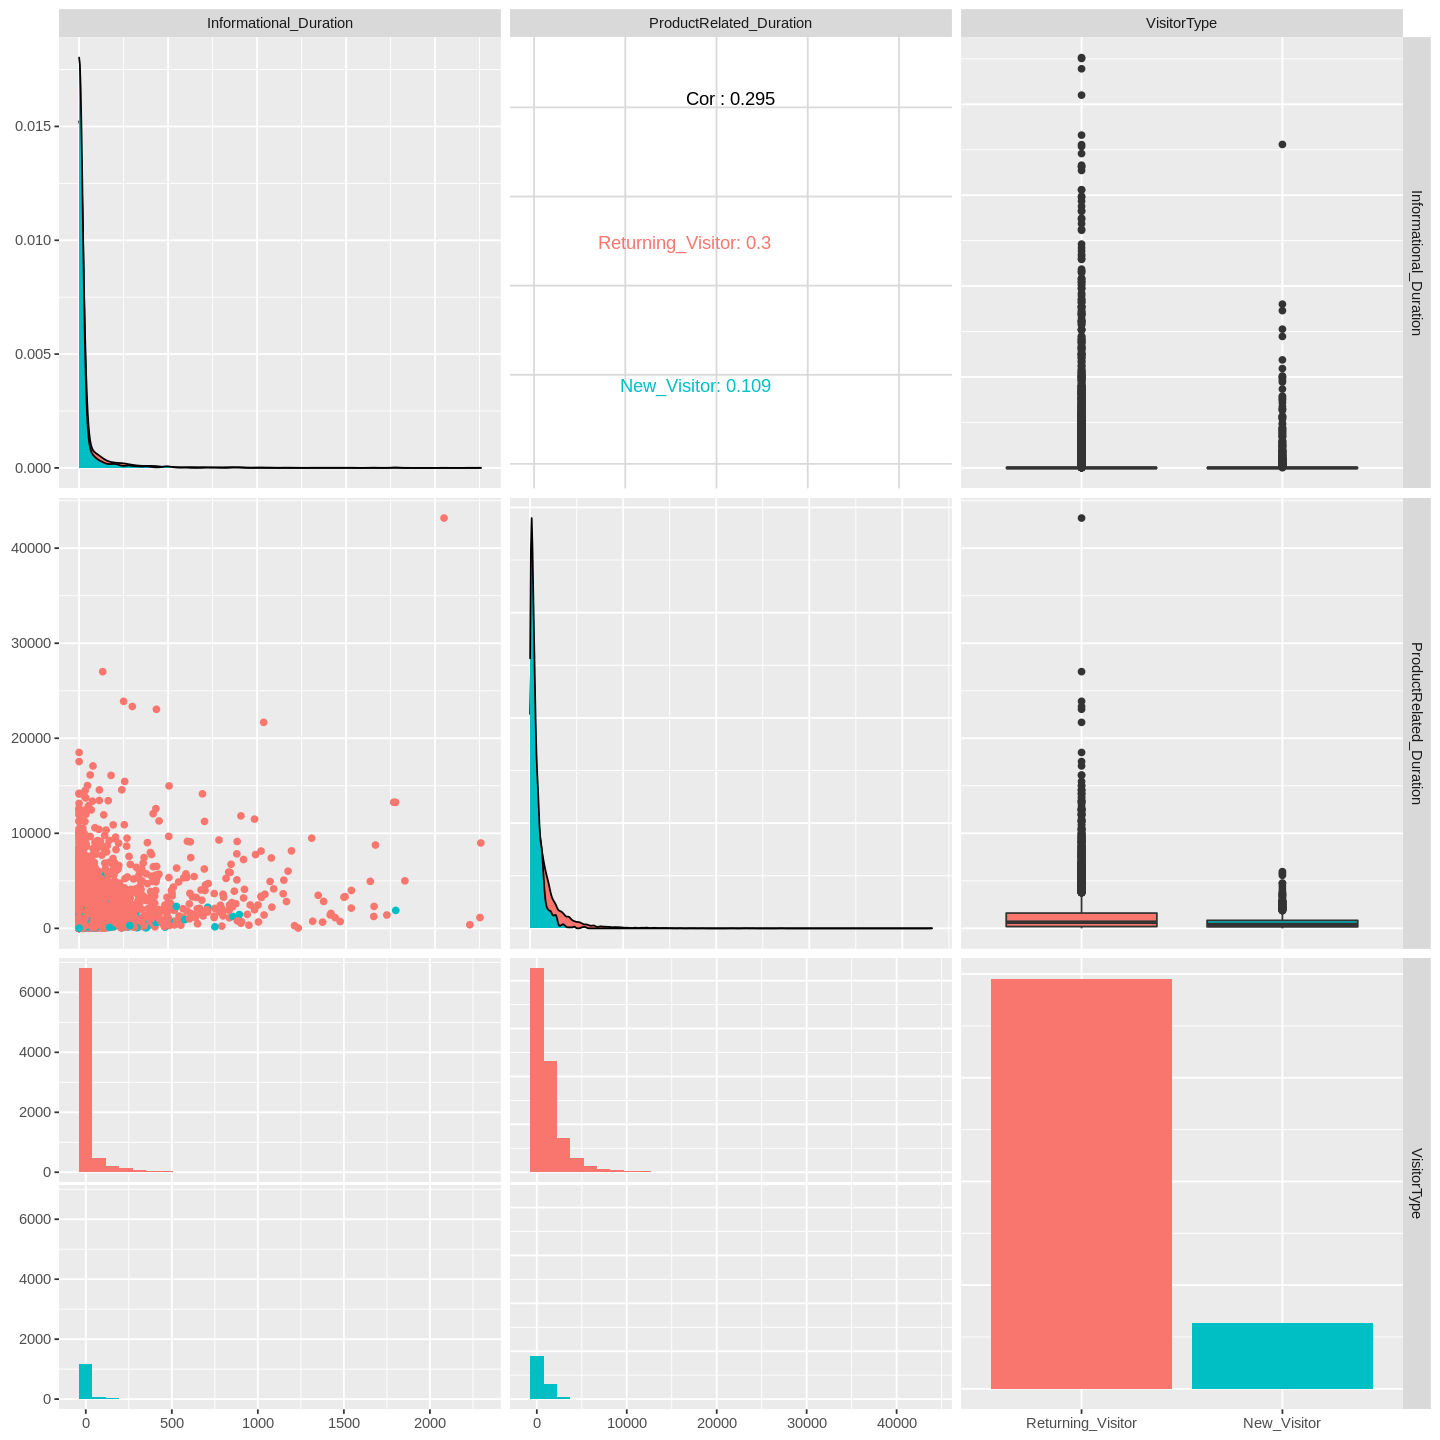

In [5]:

tidy_data_cor <- ggpairs(shoppers_train, ggplot2::aes(colour=VisitorType))
options(repr.plot.width = 12, repr.plot.height = 12)
tidy_data_cor

<b>Figure 5: Summary table for mean product-related duration and mean informational-related duration for each visitor type </b><br>

In [6]:

shoppers_means = group_by(shoppers_train, VisitorType) %>%
        summarize(mean_pr_dur = mean(ProductRelated_Duration, na.rm = TRUE), 
                 mean_info_dur = mean(Informational_Duration, na.rm = TRUE))
shoppers_means

`summarise()` ungrouping output (override with `.groups` argument)



VisitorType,mean_pr_dur,mean_info_dur
<fct>,<dbl>,<dbl>
Returning_Visitor,1288.0539,37.04248
New_Visitor,623.8661,19.20716


<b>Figure 6: Graphs for predictors vs. visitor type</b><br>
The following bar graphs show the relationship between visitor type and the mean value of informational and product related durations. The graph on the left compares visitor types to informational duration and the graph on the right compares visitor type to product related durations. It is evident that a significant portion of the visitors in our dataset are returning visitors; this might result in an unbalanced training set. We accounted for this in our data pre-processing step.

Warning message:
“package ‘cowplot’ was built under R version 4.0.3”


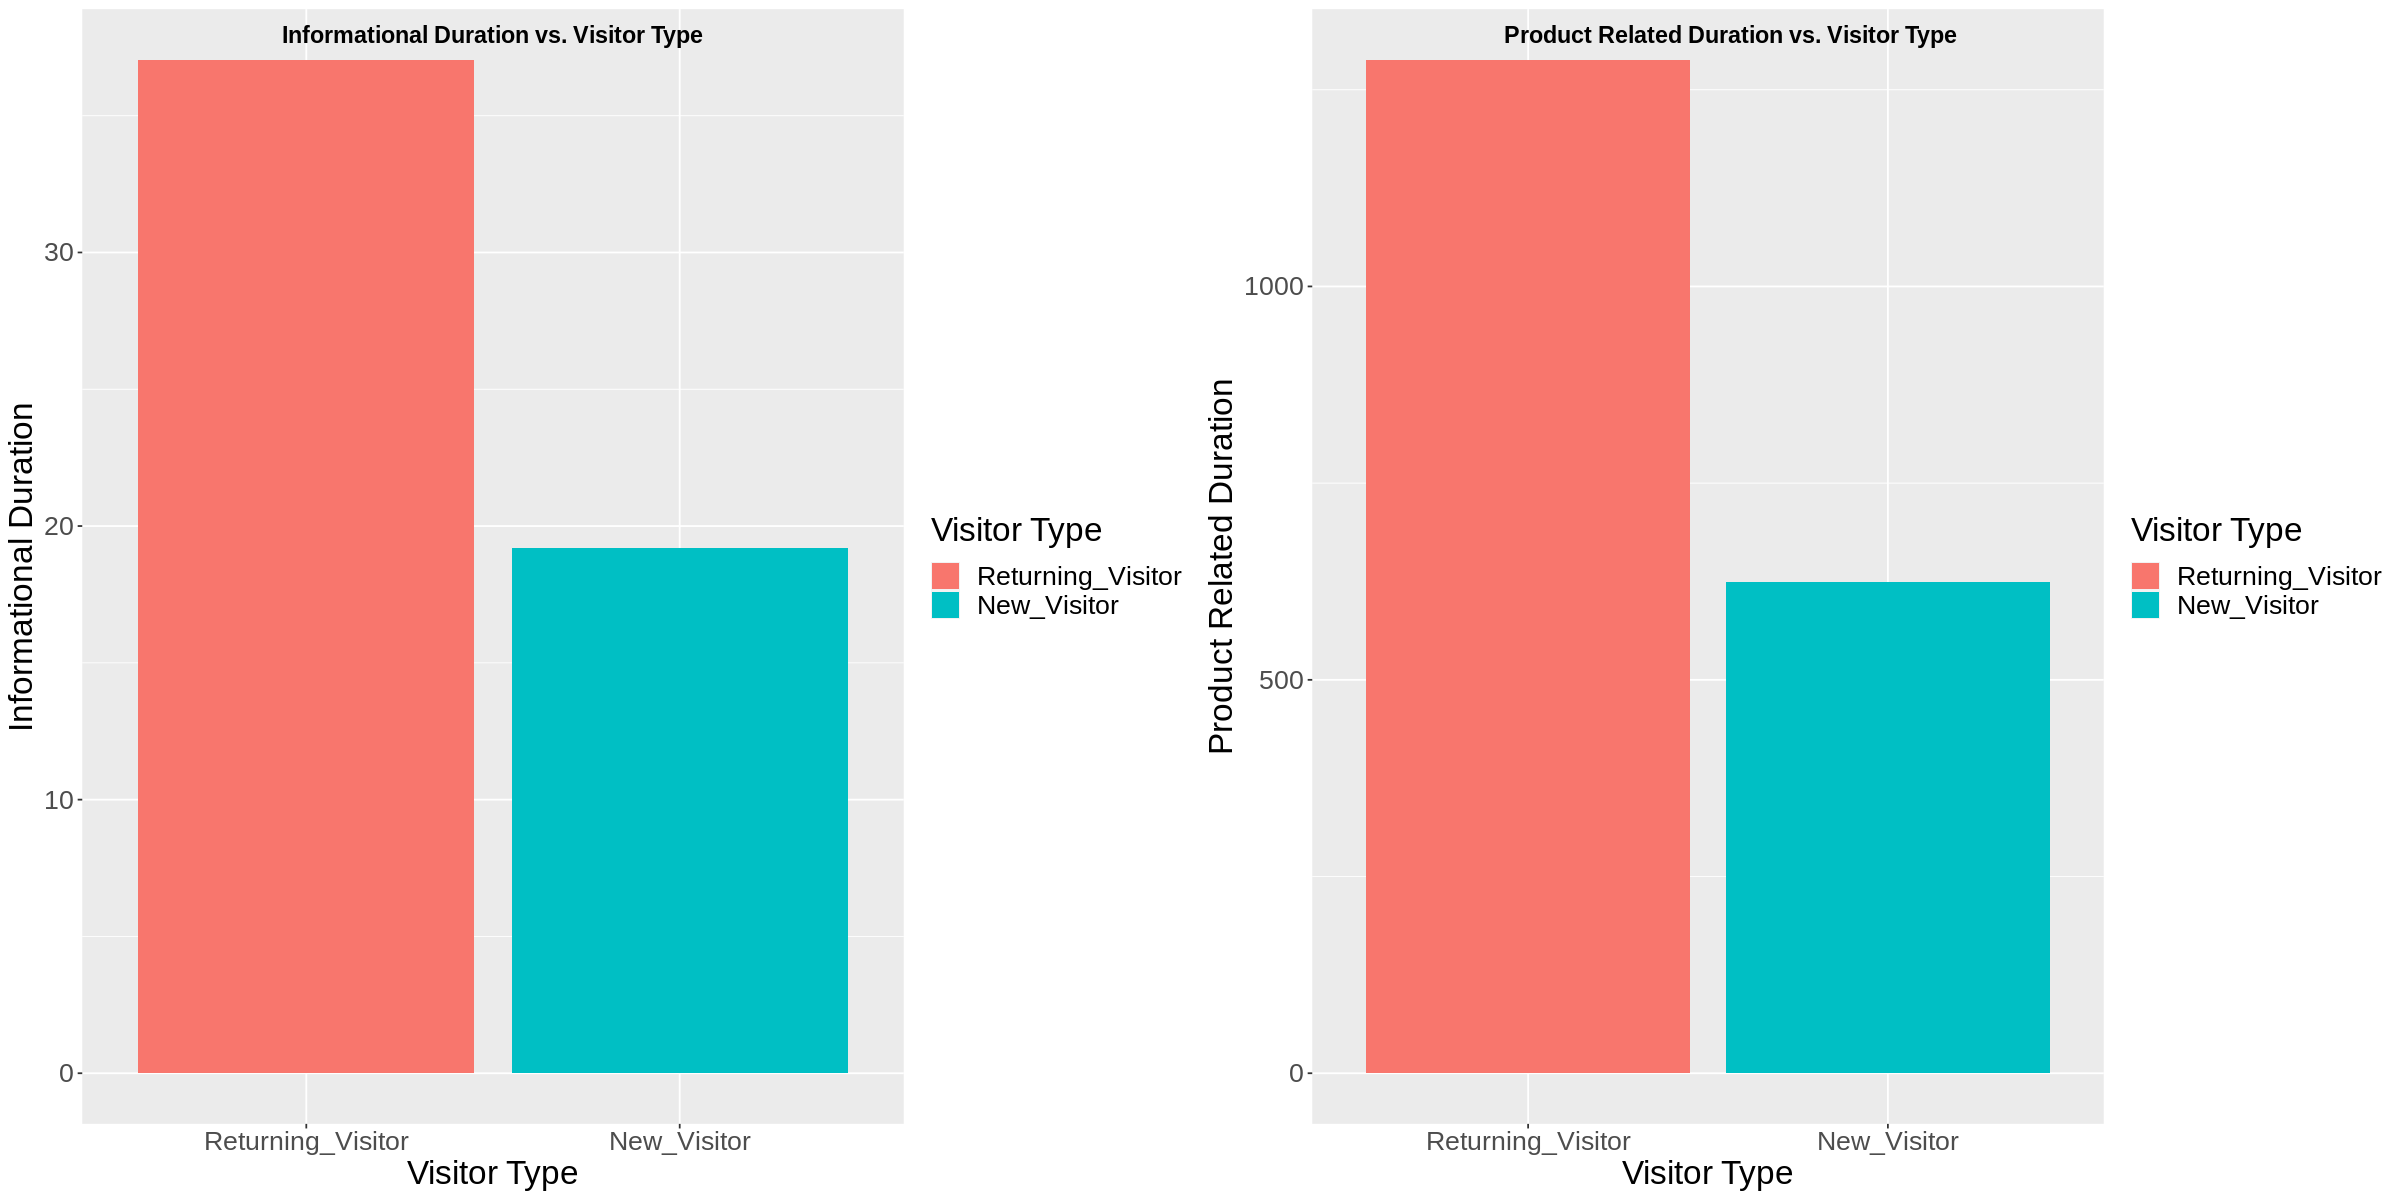

In [7]:


options(repr.plot.width = 20, repr.plot.height = 10)

shoppers_ID_plot = shoppers_means %>%
        ggplot(aes(x = VisitorType, y = mean_info_dur, fill = VisitorType)) +
        geom_bar(stat = "identity") +
        labs(x = "Visitor Type", y = "Informational Duration", fill = "Visitor Type") +
        theme(text = element_text(size = 20))

shoppers_PRD_plot = shoppers_means %>%
        ggplot(aes(x = VisitorType, y = mean_pr_dur, fill = VisitorType)) +
        geom_bar(stat = "identity") +
        labs(x = "Visitor Type", y = "Product Related Duration", fill = "Visitor Type") +
        theme(text = element_text(size = 20))

library(cowplot)
plot_grid(shoppers_ID_plot, shoppers_PRD_plot, nrow = 1, 
          labels = c('Informational Duration vs. Visitor Type', 'Product Related Duration vs. Visitor Type'),
          vjust = 2.5,
          hjust = -0.67)



<h3> Data Preprocessing </h3>

To address the classifier imbalance problem, we used the oversampling method on our training data to achieve a more uniform distribution of visitor types by adding more “new visitors”. After upsampling, the training data set consisted of 7914 returning visitors and 7914 new visitors.

<h4><b>Figure 7</b></h4>

In [8]:
upsampled_recipe <- recipe(VisitorType ~ Informational_Duration + ProductRelated_Duration, data = shoppers_train) %>%
    step_upsample(VisitorType, over_ratio = 1, skip = FALSE) %>% 
    prep()
upsampled_recipe

upsampled_shoppers <- bake(upsampled_recipe, shoppers_train)

upsampled_shoppers %>%
  group_by(VisitorType) %>%
  summarize(n = n())
upsampled_shoppers


Warning message:
“`step_upsample()` is deprecated as of recipes 0.1.13.
Please use `themis::step_upsample()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Training data contained 9185 data points and no missing data.

Operations:

Up-sampling based on VisitorType [trained]

`summarise()` ungrouping output (override with `.groups` argument)



VisitorType,n
<fct>,<int>
Returning_Visitor,7914
New_Visitor,7914


Informational_Duration,ProductRelated_Duration,VisitorType
<dbl>,<dbl>,<fct>
0,0.000000,Returning_Visitor
0,0.000000,Returning_Visitor
0,2.666667,Returning_Visitor
⋮,⋮,⋮
0,396.5000,New_Visitor
0,744.8333,New_Visitor
0,935.2500,New_Visitor


 Since K-NN is sensitive to the scale of the predictors, we performed preprocessing with the recipe function on the training data for standardization purposes. <br>

<h4><b>Figure 8: scaling</b></h4>

In [9]:
shoppers_recipe <- recipe(VisitorType ~ Informational_Duration + ProductRelated_Duration, data = upsampled_shoppers) %>% 
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) 
shoppers_recipe


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

<h3> Evaluation & Tuning </h3>

To select the number of neighbours K for the class vote, we then tuned the model by splitting our overall training data set further into two subsets (training set and validation set). This allowed us to use the training set for building the classifier and the validation set for evaluating it. <br> Cross-validation played a major role in our process of tuning. We decided to do a 5-fold cross-validation, using the function vfold_cv. 

To optimize our classifier's performance, we also used cross-validation to calculate an accuracy for each value of K in a reasonable range, and then chose the value of K that would provide the best accuracy. Therefore, we made use of the tune() function in the model specification rather than a particular value. Afterwards, we used tune_grid function to fit the model for each value in a range of parameter values. We passed in 10 for the grid argument to specify that the tuning should try 10 values of the number of neighbours K when tuning. 

<h4><b>Figure 9: K-NN model specification</b></h4>

In [10]:
shoppers_vfold <- vfold_cv(upsampled_shoppers, v = 5, strata = VisitorType)

shoppers_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")
shoppers_tune



K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


<h4><b>Figure 10: Accuracies table</b></h4>

In [11]:
shoppers_results <- workflow() %>%
       add_recipe(shoppers_recipe) %>%
       add_model(shoppers_tune) %>%
       tune_grid(resamples = shoppers_vfold, grid = 10) %>%
       collect_metrics()

accuracies<- shoppers_results %>% 
       filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8447679,5,0.002386720,Model01
3,accuracy,binary,0.8158323,5,0.002836422,Model02
5,accuracy,binary,0.7743237,5,0.005004251,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
12,accuracy,binary,0.6983203,5,0.005080022,Model08
13,accuracy,binary,0.6943400,5,0.005871716,Model09
15,accuracy,binary,0.6905481,5,0.006799619,Model10


By plotting the accuracy versus K (as demonstrated in Figure 12), we selected the best value of the number of neighbours. We decided to choose 3 as our K, as it is a value where we could achieve roughly optimal accuracy, seems reliable in the presence of uncertainty and the cost of training is not prohibitive. 

<h4><b>Figure 11: Accuracy vs. K graph</b></h4>

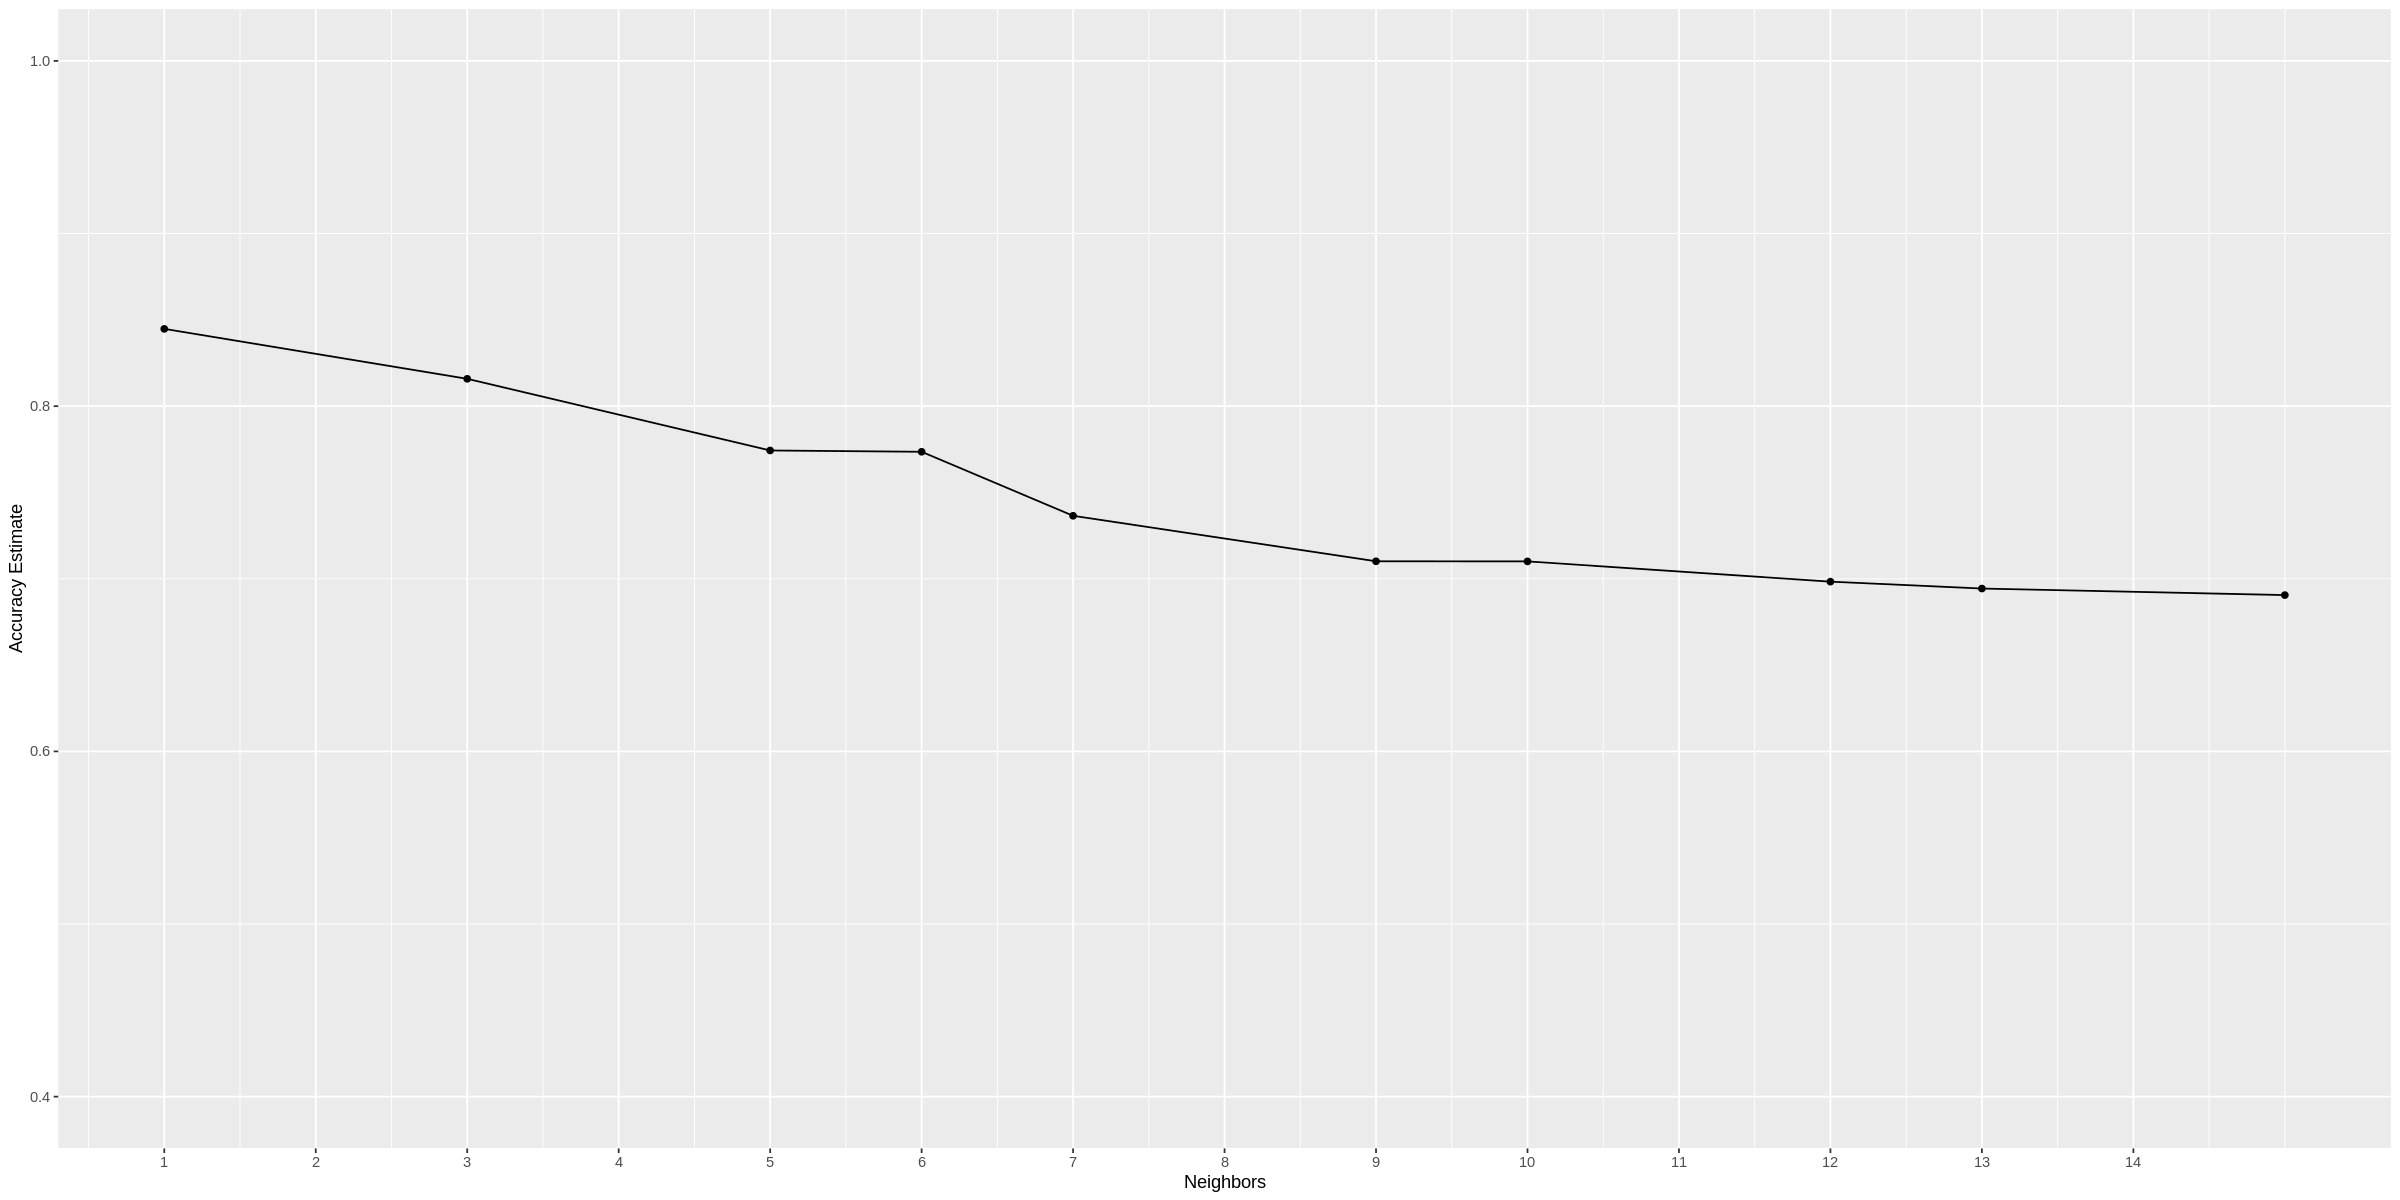

In [12]:
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
accuracy_versus_k



<h4><b>Figure 12: Retraining model with K = 3</b></h4>

In [13]:
shoppers_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
       set_engine("kknn") %>%
       set_mode("classification")
                                           
                               
shoppers_fit <- workflow() %>%
       add_recipe(shoppers_recipe) %>%
       add_model(shoppers_spec) %>%
       fit(data = upsampled_shoppers)
shoppers_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~3, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1511246
Best kernel: rectangular
Best k: 3

<h3> Results </h3>
<h4><b>Figure 13: predictions table</b></h4>

Once the data was preprocessed, we passed shoppers_fit and shoppers_test to the predict function and used the bind_cols() function to combine the data frames to predict VisitorType based on Informational_Duration and ProductRelated_Duration. We used the metrics function to find the accuracy of our predictions by passing VisitorType to the truth argument and .pred_class to the estimate argument which produced a data frame that shows approximately 71% accuracy. After, we used the conf_mat function with VisitorType passed to the truth argument and .pred_class passed to the estimate argument to analyze the predicted labels and correct labels. In the table produced, there were 2171 correct predictions made (2058 correctly predicted returning visitors and 113 correctly predicted new visitors) and 889 inaccurate predictions made (579 visitors were predicted to be new visitors when they were returning visitors and 310 visitors were predicted to be returning visitors when they were new visitors). 


In [14]:
shoppers_predictions <- predict(shoppers_fit, shoppers_test) %>%
       bind_cols(shoppers_test)
shoppers_predictions

shoppers_metrics <- shoppers_predictions %>%
         metrics(truth = VisitorType, estimate = .pred_class)    
shoppers_metrics

shoppers_conf_mat <- shoppers_predictions %>% 
       conf_mat(truth = VisitorType, estimate = .pred_class)
shoppers_conf_mat



.pred_class,Informational_Duration,ProductRelated_Duration,VisitorType
<fct>,<dbl>,<dbl>,<fct>
Returning_Visitor,0,64.000,Returning_Visitor
Returning_Visitor,0,0.000,Returning_Visitor
Returning_Visitor,0,1135.444,Returning_Visitor
⋮,⋮,⋮,⋮
New_Visitor,0.00,472.875,Returning_Visitor
Returning_Visitor,368.25,1121.250,Returning_Visitor
New_Visitor,0.00,1075.250,Returning_Visitor


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.70947712
kap,binary,0.03754792


                   Truth
Prediction          Returning_Visitor New_Visitor
  Returning_Visitor              2058         310
  New_Visitor                     579         113

<h3><b>Visualization</b></h3>

We made a plot for our confusion matrix so it’s easier to interpret. We have a grid that’s split into 4 sections: visitors predicted to be returning visitors when they’re new visitors, correctly predicted new visitors, correctly predicted returning visitors, and visitors predicted to be new visitors when they‘re returning visitors. The correctly predicted visitors are coloured blue and the incorrectly predicted visitors are coloured pink. Each section is labelled with the number of predicted visitors, so it resembles a confusion matrix. 


<h3><b>Figure 14: Confusion Matrix Plot</b></h3>

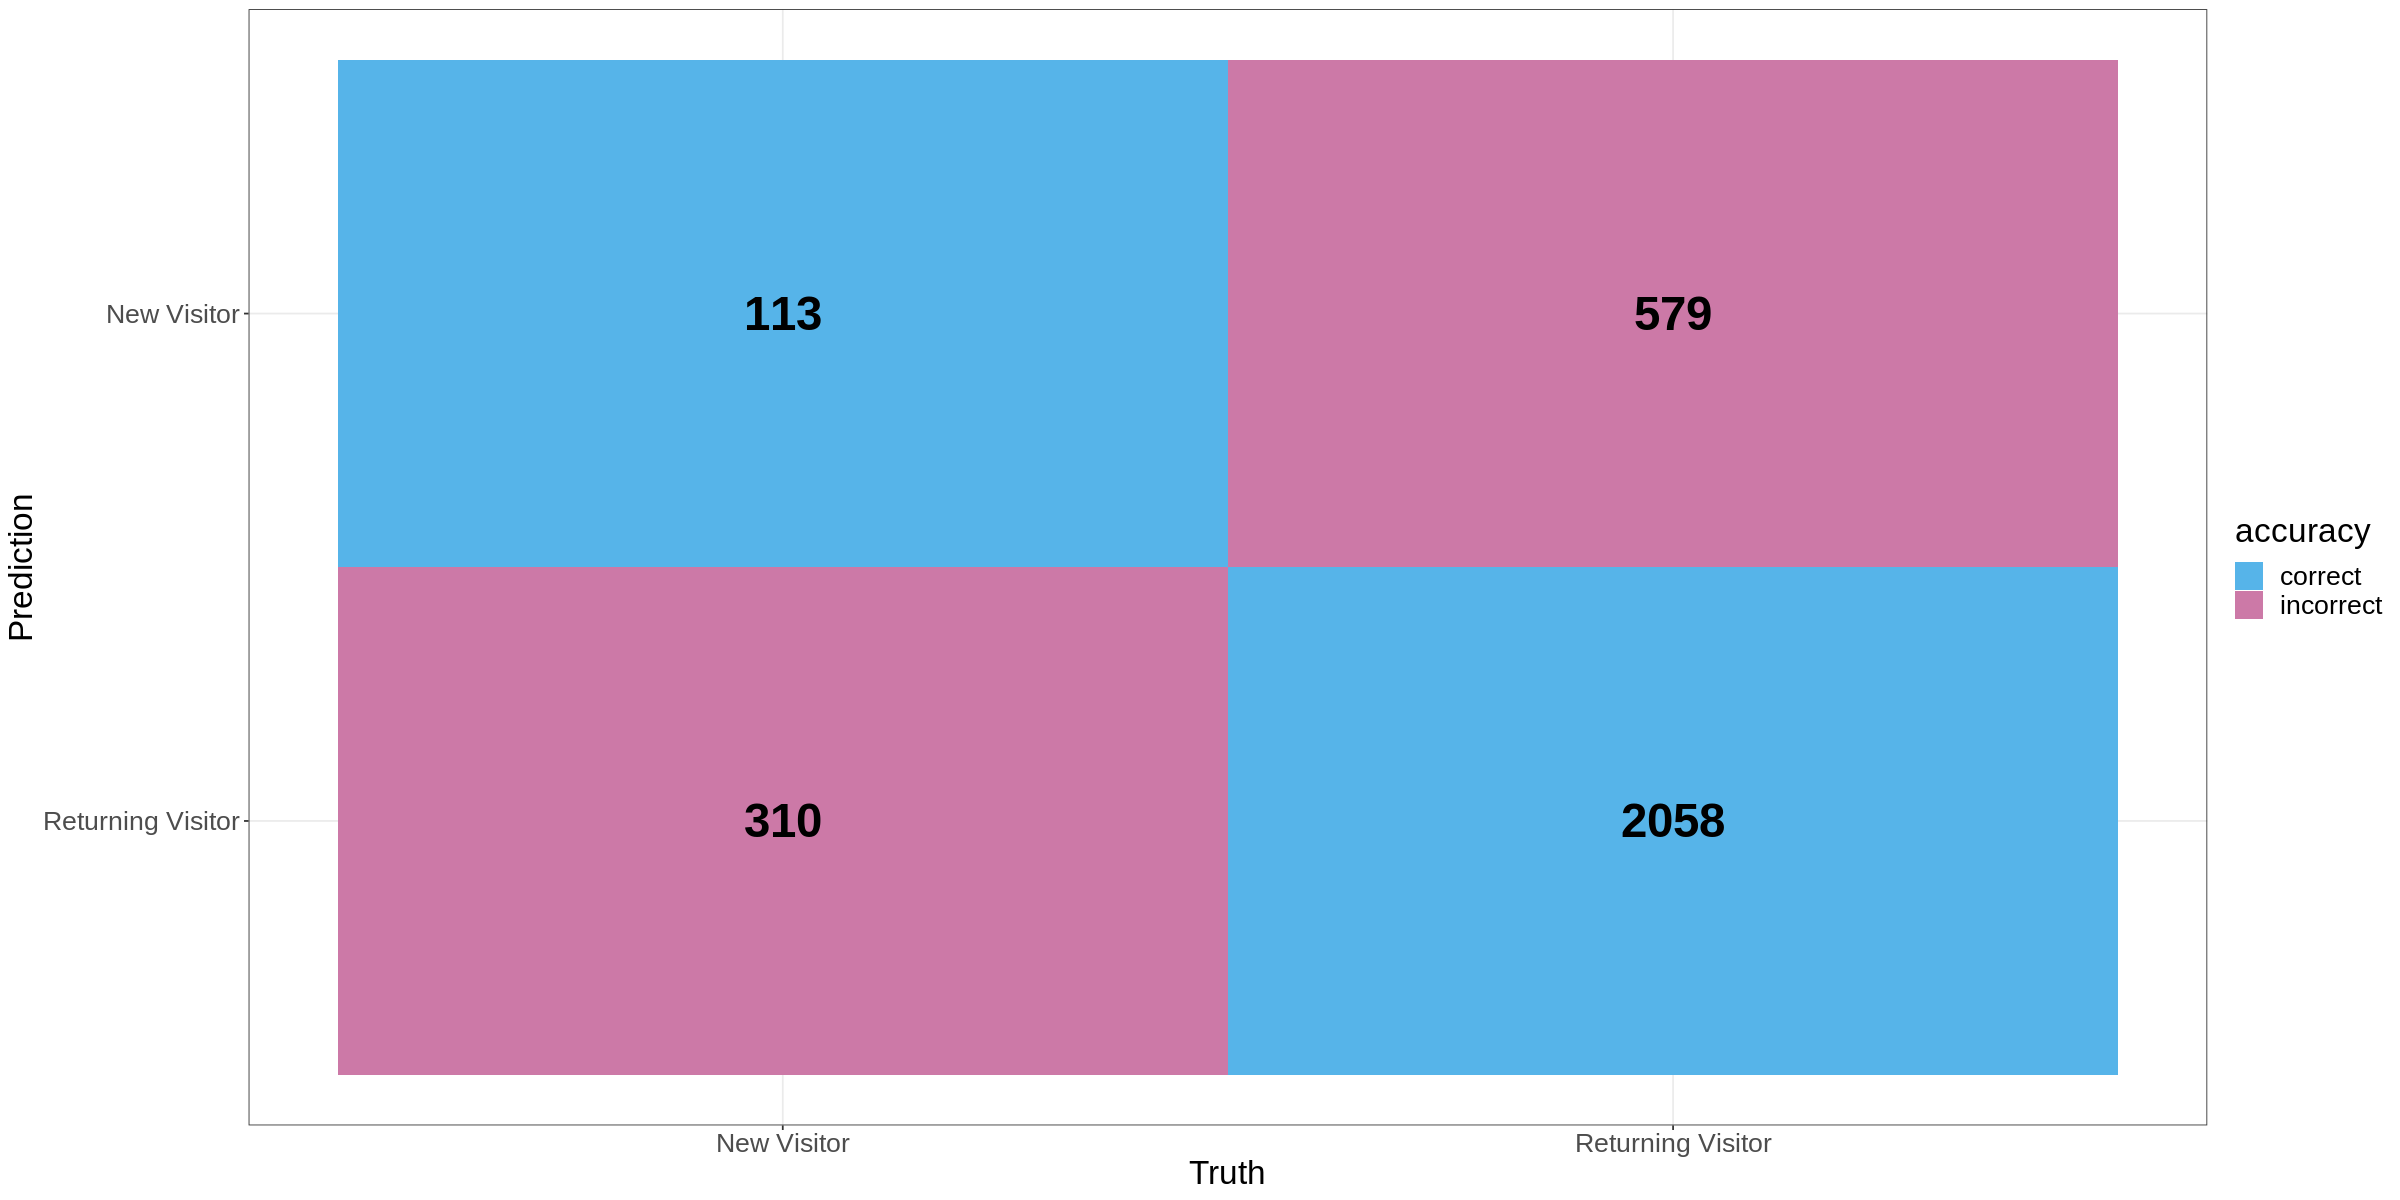

In [15]:
# code inspired and modified from this source: https://stackoverflow.com/questions/37897252/plot-confusion-matrix-in-r-using-ggplot 

vt <- c("New Visitor", "Returning Visitor")

# takes in the total number of incorrect predictions and total number correct predictions
truth <- factor(rep(vt, times = c(423, 2637)),
    levels = rev(vt))

# distinguished the number of predictions based on whether they're incorrect new visitors, correct new visitors, correct returning visitors, or incorrect returning visitors 
pred <- factor(c(rep(vt, times = c(113, 310)),
    rep(vt, times = c(579, 2058))),
    levels = rev(vt))

# changed names of columns (Reference to Truth and Freq to Value)
table <- data.frame(confusionMatrix(pred, truth)$table) %>%
    mutate(Truth = Reference, Value = Freq) %>% 
    select(-Reference, -Freq)

# make the sections coloured according to whether they're correct or incorrect predictions 
plotTable <- table %>%
    mutate(accuracy = ifelse(table$Prediction == table$Truth, "correct", "incorrect")) %>%
    group_by(Truth)

ggplot(data = plotTable, mapping = aes(x = Truth, y = Prediction, fill = accuracy)) +
    geom_tile() +
    geom_text(aes(label = Value), vjust = .5, fontface  = "bold", alpha = 1, size = 10) +
    scale_fill_manual(values = c(correct = "#56B4E9", incorrect = "#CC79A7")) +
    theme_bw() +
    theme(text = element_text(size = 20)) +
    xlim(rev(levels(table$Truth)))

<h3><b>Figure 15: Predictions plot</b></h3>

To visualize our results we made 2 scatterplots to analyze and compare the actual visitor types vs. the predicted visitor types more clearly. The first scatterplot shows the actual amount of returning and new visitors with the product-related duration on the y-axis and the informational duration on the x-axis and the points coloured based on visitor type (returning visitors in red and new visitors in blue). The second scatterplot shows the predicted number of returning and new visitors. The scatterplot on the left shows the number correctly predicted returning visitors (red) and incorrectly predicted returning visitors (blue), and the scatterplot on the right shows the number of correctly predicted new visitors (blue) and incorrectly predicted new visitors (red). Based on these plots, we can see that although the accuracy was fairly high at approximately 71%, we can see that many returning visitors were predicted correctly while many new visitors were predicted incorrectly.  
<br>


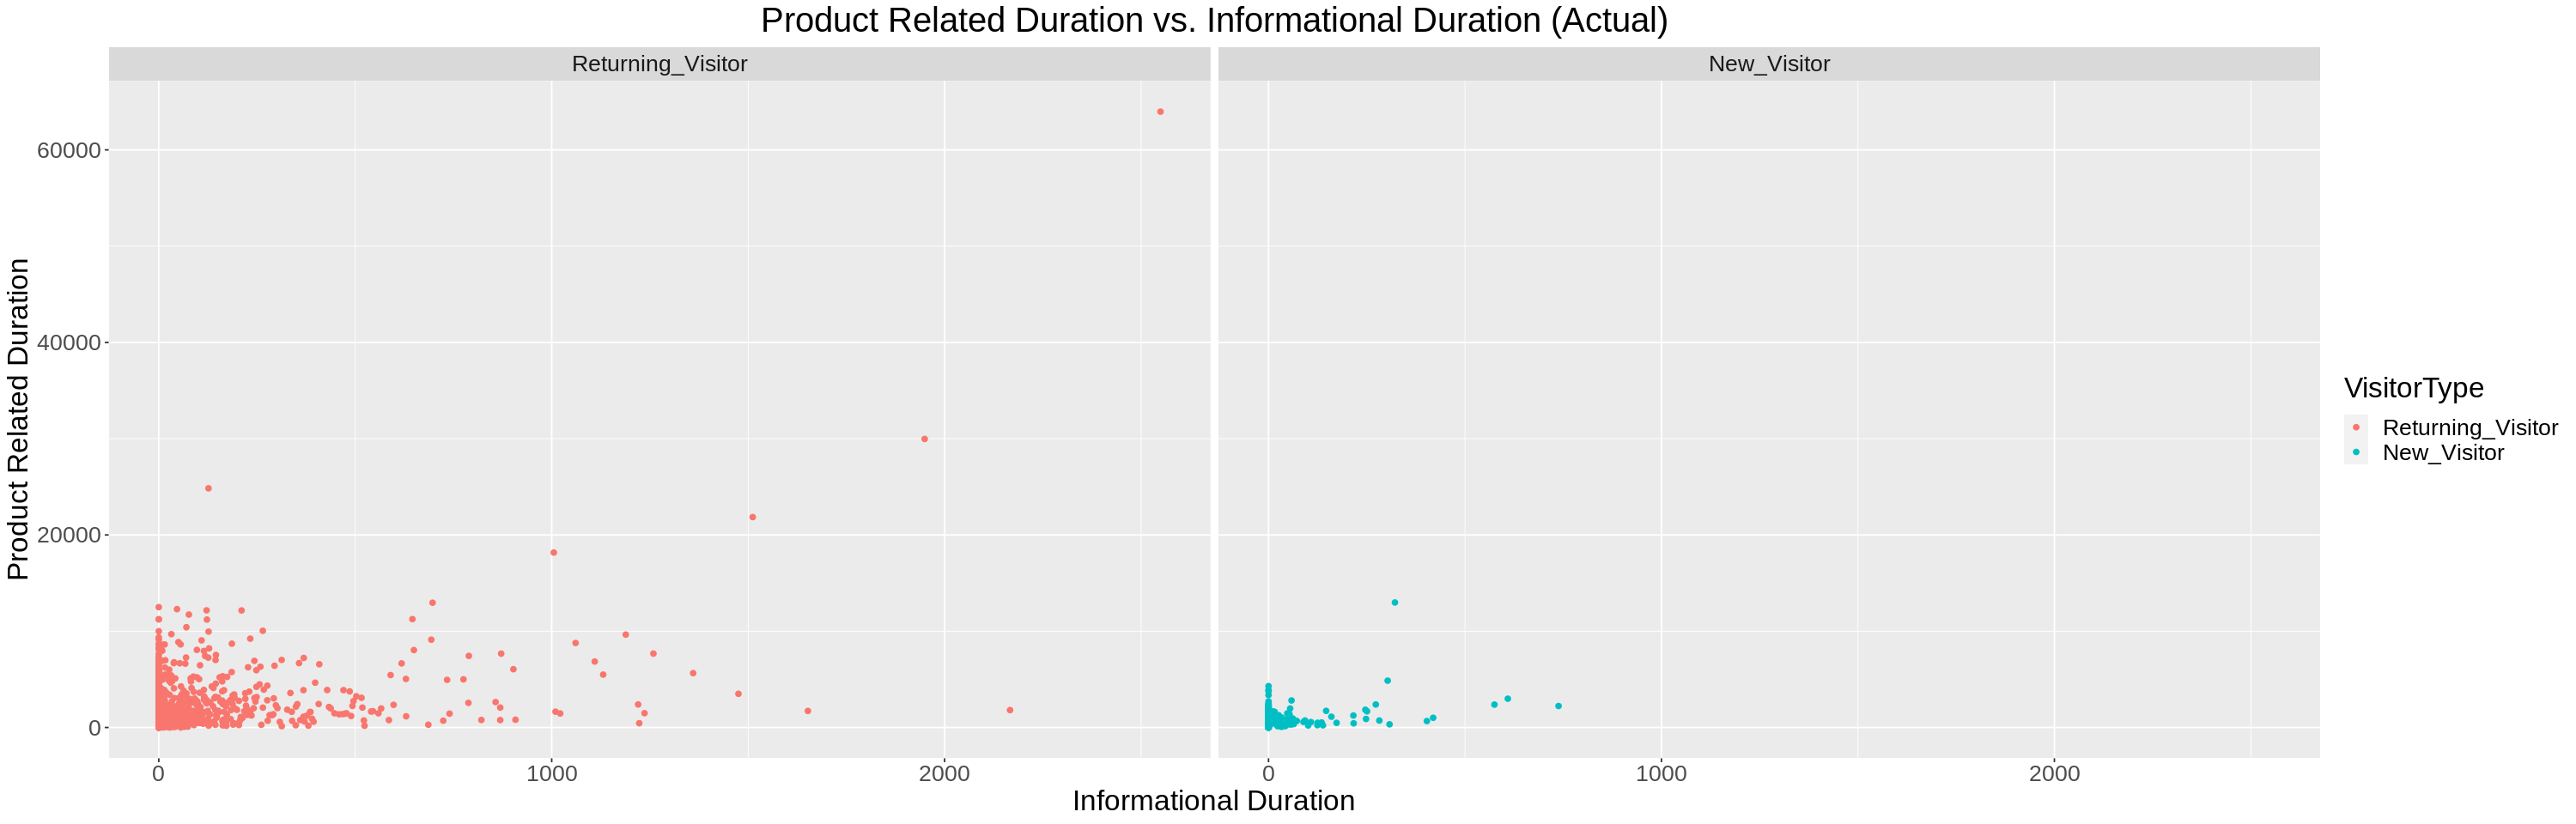

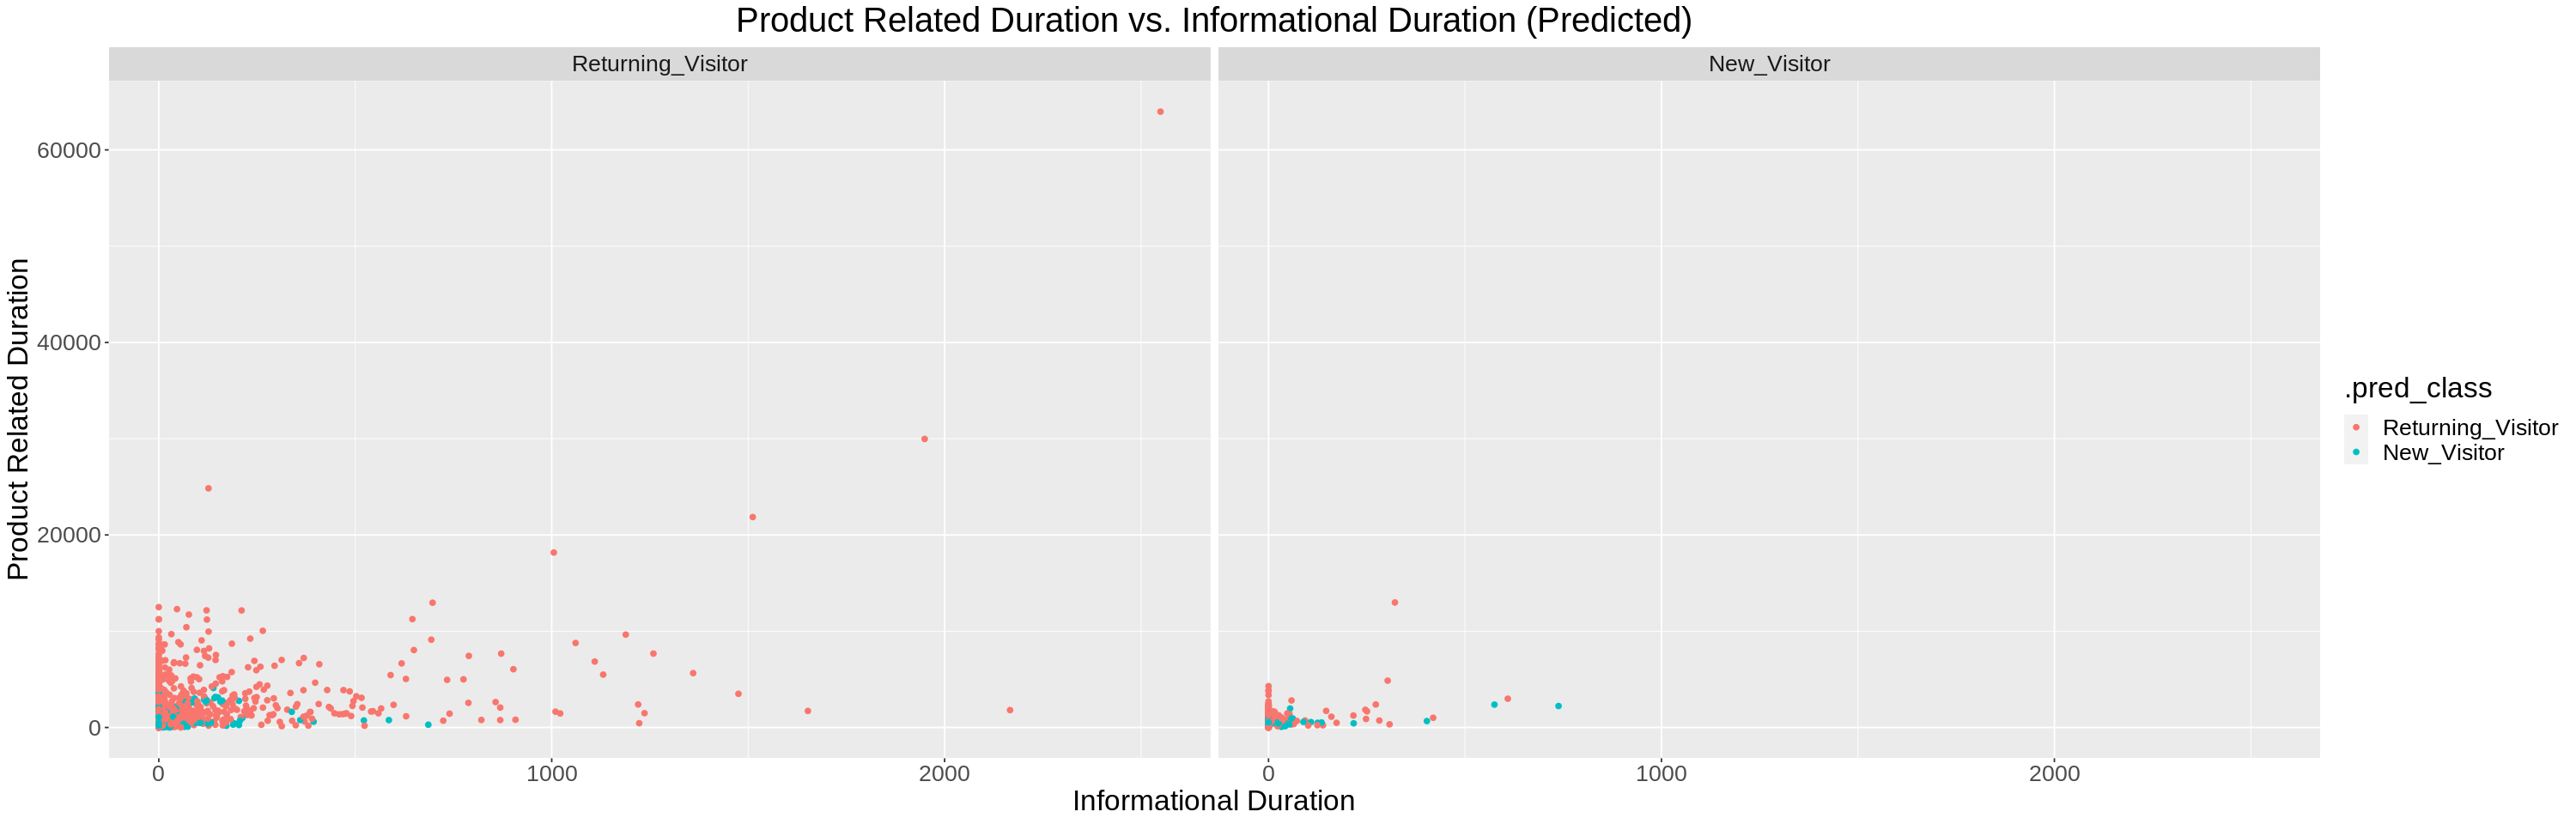

In [16]:
results_graph <- shoppers_predictions %>% 
    ggplot(aes(x = Informational_Duration, y = ProductRelated_Duration, color = VisitorType)) +
     geom_point(stat = "identity") + 
     xlab("Informational Duration") +
     ylab("Product Related Duration") +
     labs(fill = "Visitor Type", title = "Product Related Duration vs. Informational Duration (Actual)") +
     theme(text = element_text(size = 20)) +
     theme(plot.title = element_text(hjust = 0.5)) +
     facet_wrap(VisitorType~.)
options(repr.plot.width = 25, repr.plot.height = 8) 
results_graph

results_graph_2 <- shoppers_predictions %>% 
    ggplot(aes(x = Informational_Duration, y = ProductRelated_Duration, color = .pred_class)) +
     geom_point(stat = "identity") + 
     xlab("Informational Duration") +
     ylab("Product Related Duration") +
     labs(fill = "Visitor Type", title = "Product Related Duration vs. Informational Duration (Predicted)") +
     theme(text = element_text(size = 20)) +
     theme(plot.title = element_text(hjust = 0.5)) +
     facet_wrap(VisitorType~.)
options(repr.plot.width = 25, repr.plot.height = 8) 
results_graph_2

<h3><b>Figure 16: Predictions graph</b></h3>

Another way we visualized our data was with 2 bar graphs to show the count of returning and new visitors displayed in the scatterplots. The left bar graph shows the count of predicted new and returning visitors and the right bar graph shows the count of actual returning and new visitors. We chose to make a bar graph as well as the scatterplots because in the plots above, it’s more difficult to visualize the count of each visitor type. 

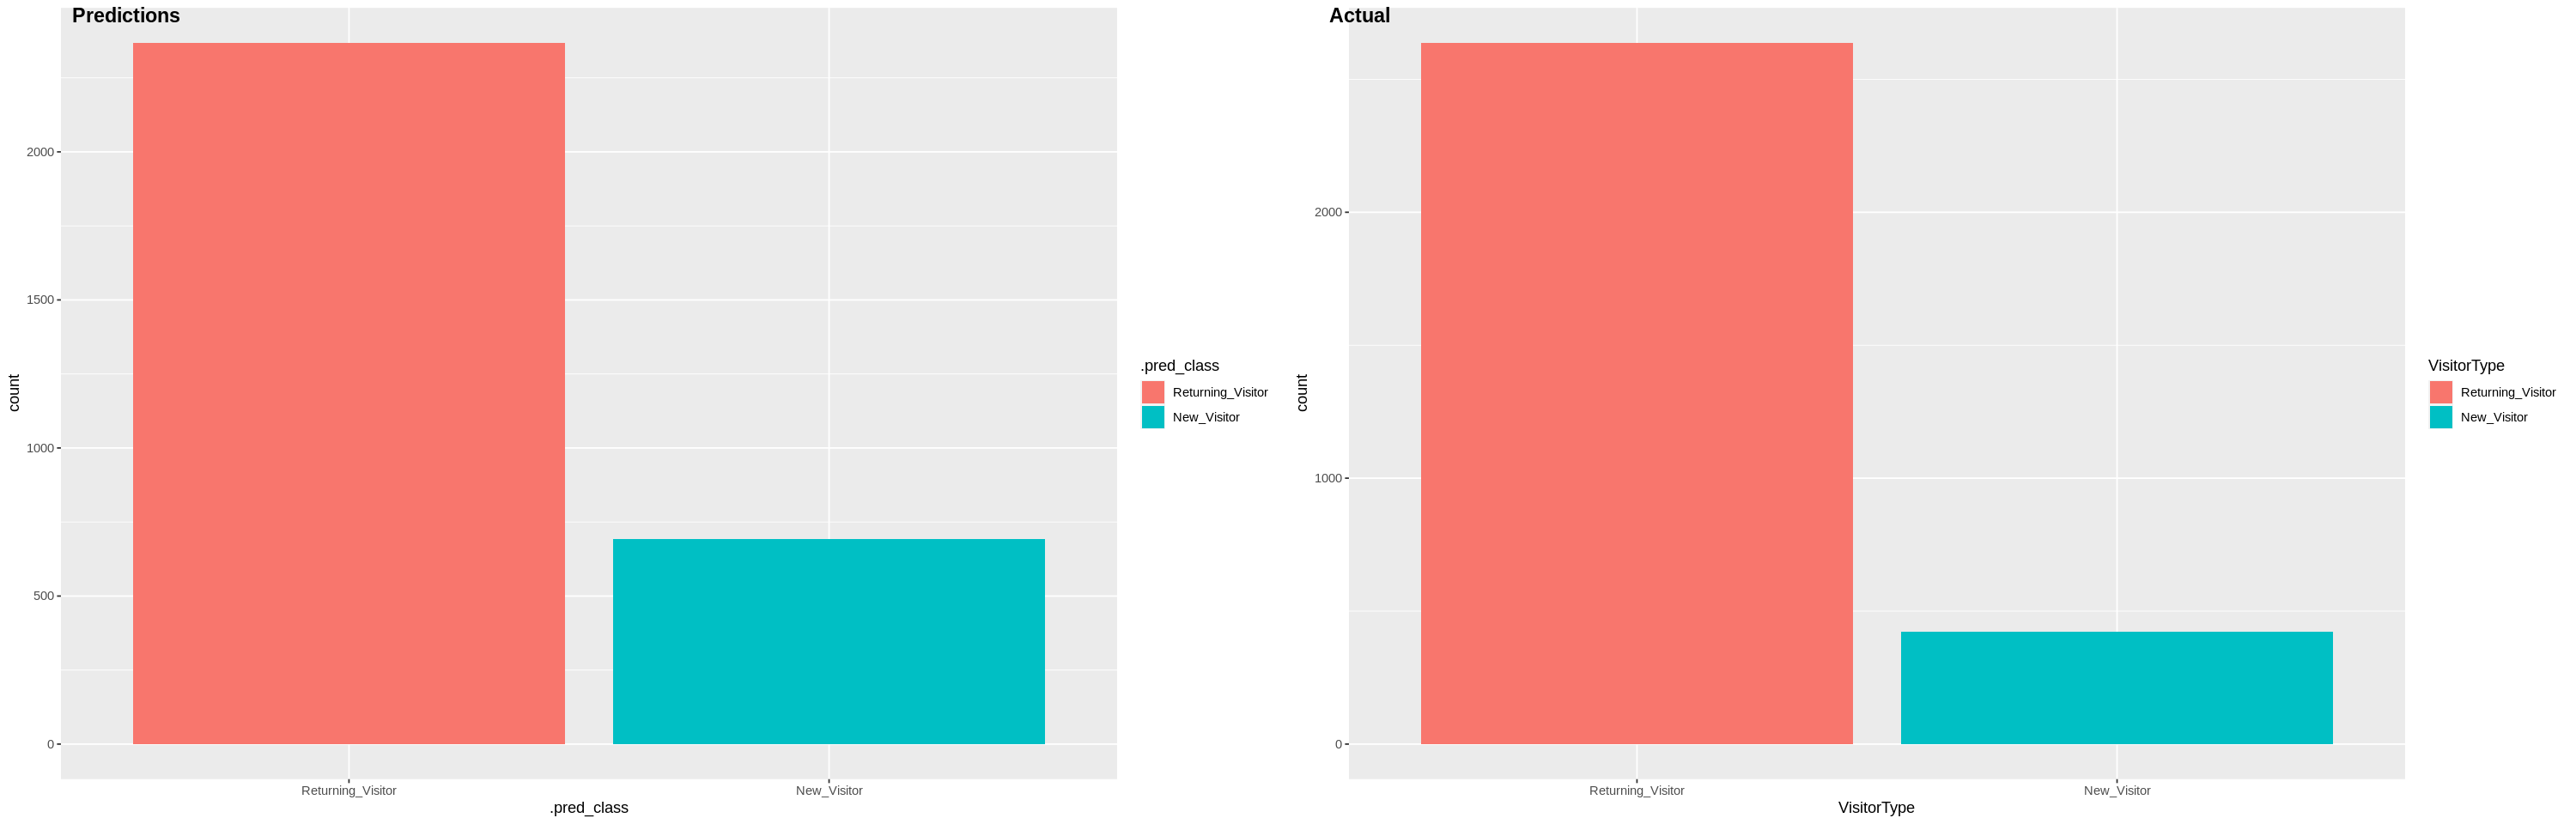

In [17]:
predictions <- ggplot(shoppers_predictions, 
       aes(x = .pred_class, 
           fill = .pred_class)) + 
  geom_bar(position = "dodge")

actual <- ggplot(shoppers_predictions, 
       aes(x = VisitorType, 
           fill = VisitorType)) + 
  geom_bar(position = "dodge")

plot_grid(predictions, actual, nrow = 1, 
          labels = c('Predictions', 'Actual'),
          hjust = -0.67)

<h2> Discussion </h2>

We found that our prediction accuracy was 71% which is acceptable for our purposes as this was purely exploratory analysis to determine whether it would be possible to differentiate between visitor types based on time spent on product-related and informational pages. It is difficult to conclude whether time spent on product-related and informational-related pages are strong predictors for visitor type, due to the fact that the original dataset contained considerably more returning visitors and new visitors. Therefore, although we have a decent prediction accuracy, this could simply be because of the highly unbalanced dataset. After all, regarding its accuracy for new visitors, our model was only able to make 113 correct predictions and 310 incorrect predictions. If more data pertaining to new visitors could be obtained, it might be worthwhile to reinvestigate.<br><br>
We expected for our accuracy to be lower than the one we observe. One of the reasons is that we had different counts for different visitor types, where returning visitors originally (before upsampling) comprised about 71% of the dataset. As we know, k-nn classification doesn’t perform well when groups are imbalanced. We expected for new visitors to be underrepresented, thus leading to a lower accuracy in predictions. We believe that one of the ways to solve this problem is to have a sample with the count for new visitors higher than the one we had before.
<br><br>
These findings could help identify the importance of differentiating between new and returning visitors. It could also give some insight into how to approach the model that would perform such classifications as well as present the problems and mistakes that could be corrected in order to make better predictions.
<br><br>
If in the future, we could have more confidence in our results, these findings could help business strategists develop more targeted marketing strategies. For example, if we determine that new visitors do spend more time on informational pages, marketers could include incentives for them to create an account and/or offer exclusive deals for generating more revenue.
<br><br>
Some of the future questions that our report could lead to might include the other variables (e.g. image/text proportion, word count, etc.) that can possibly predict the number of new visitors vs returning visitors with knn-classification, or even what other methods could be used to make more accurate predictions that are less prone to such imbalanced data. <br>


<h2> References</h2>

Coppola,  Daniela. “E-commerce in Canada - Statistics & Facts”. Statista, https://www.statista.com/topics/2728/e-commerce-in-canada/#:~:text=In%20late%202019%2C%20e%2Dcommerce,from%2025.4%20billion%20in%202019. Accessed 7 April 2021.
<br><br>
“Google Analytics Made Easy: New Visitors vs. Returning Visitors”. DBS Interactive, https://www.dbswebsite.com/blog/google-analytics-made-easy-new-visitors-vs-returning-visitors/#:~:text=The%20Difference%20Between%20New%20and%20Returning%20Visitors&text=New%20Visitors%20are%20those%20navigating,time%20on%20a%20specific%20device.&text=Returning%20Visitors%20have%20visited%20your%20site%20before%20and%20are%20back%20for%20more! Accessed 7 April 2021.
<br><br>
Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks. Neural Comput & Applic 31, 6893–6908 (2019). https://doi.org/10.1007/s00521-018-3523-0
